In [1]:
import json
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import sys
sys.path.insert(0, '../utils')
import data_utils

sys.path.insert(0, '../models')
import log_reg_word_embeddings_all

In [3]:
df_train = data_utils.load_data_set('../data/train/train.csv')
df_train_x = df_train[['head.word', 'tail.word', 'sentence']]
df_train_y = df_train['relation']

In [4]:
model = log_reg_word_embeddings_all.LogRegWordEmbeddingsAll()

In [5]:
model.fit(df_train_x, df_train_y)

Tokenizing head.words, tail.words and sentences...
    head.word         tail.word  \
0  [syracuse]  [onondaga, lake]   
1  [syracuse]  [onondaga, lake]   
2  [syracuse]  [onondaga, lake]   
3    [turkey]           [adana]   
4    [turkey]           [adana]   

                                            sentence  
0  [she, also, oversaw, refinancing, state, super...  
1  [more, 2, 5, million, cubic, yards, contaminat...  
2  [the, onondaga, nation, 1, 500, members, feder...  
3  [he, born, istanbul, raised, eastern, city, ad...  
4  [by, end, recent, tour, rollins, met, soldiers...  
Averaging word embeddings...
                                           head.word  \
0  [-0.03558, 0.18046, 0.052801, -0.058331, -0.12...   
1  [-0.03558, 0.18046, 0.052801, -0.058331, -0.12...   
2  [-0.03558, 0.18046, 0.052801, -0.058331, -0.12...   
3  [0.090082, -0.021439, -0.200264, 0.084044, 0.1...   
4  [0.090082, -0.021439, -0.200264, 0.084044, 0.1...   

                                          

In [6]:
model.predict(df_train_x.head())

Tokenizing head.words, tail.words and sentences...
    head.word         tail.word  \
0  [syracuse]  [onondaga, lake]   
1  [syracuse]  [onondaga, lake]   
2  [syracuse]  [onondaga, lake]   
3    [turkey]           [adana]   
4    [turkey]           [adana]   

                                            sentence  
0  [she, also, oversaw, refinancing, state, super...  
1  [more, 2, 5, million, cubic, yards, contaminat...  
2  [the, onondaga, nation, 1, 500, members, feder...  
3  [he, born, istanbul, raised, eastern, city, ad...  
4  [by, end, recent, tour, rollins, met, soldiers...  
Averaging word embeddings...
                                           head.word  \
0  [-0.03558, 0.18046, 0.052801, -0.058331, -0.12...   
1  [-0.03558, 0.18046, 0.052801, -0.058331, -0.12...   
2  [-0.03558, 0.18046, 0.052801, -0.058331, -0.12...   
3  [0.090082, -0.021439, -0.200264, 0.084044, 0.1...   
4  [0.090082, -0.021439, -0.200264, 0.084044, 0.1...   

                                          

array(['/location/location/contains', '/location/location/contains',
       '/location/location/contains', 'NA', 'NA'], dtype=object)

In [7]:
import pickle

save_dir = '../trained_models/log_reg_word_embeddings_all.pkl'
with open(save_dir, 'wb') as save_file:
    pickle.dump(model.model, save_file)

In [8]:
with open(save_dir, 'rb') as saved_file:
    loaded_model = pickle.load(saved_file)

In [9]:
loaded_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=4, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [10]:
df_test = data_utils.load_data_set('../data/test/test.csv')
df_test_x = df_test[['head.word', 'tail.word', 'sentence']]
df_test_y = df_test['relation']

In [11]:
predictions = model.predict(df_test_x)

Tokenizing head.words, tail.words and sentences...
              head.word            tail.word  \
0  [arthur, schnitzler]             [vienna]   
1      [roberto, calvi]              [italy]   
2      [johnny, rivers]          [louisiana]   
3         [philippines]  [san, carlos, city]   
4       [alex, salmond]           [scotland]   

                                            sentence  
0  [the, little, comedy, mannered, operetta, base...  
1  [a, court, rome, acquitted, five, people, accu...  
2  [there, also, performers, born, louisiana, inc...  
3  [when, julian, resuello, mayor, san, carlos, c...  
4  [a3, concern, raised, libya, deal, alex, salmo...  
Averaging word embeddings...
                                           head.word  \
0  [0.14344, 0.140793, 0.024160499999999994, 0.19...   
1  [0.126935, 0.115716, -0.051785, 0.20748, 0.177...   
2  [0.08202799999999999, 0.08247650000000001, -0....   
3  [0.25001, -0.049111, -0.12445, 0.044313, 0.221...   
4  [0.173818, 0.10580

In [12]:
from collections import Counter
Counter(predictions)

predicted_labels = predictions
gold_labels = df_test_y

Counter(gold_labels)

Counter({'NA': 159391,
         '/people/person/nationality': 1734,
         '/location/location/contains': 7212,
         '/people/person/place_lived': 1138,
         '/business/person/company': 671,
         '/location/country/administrative_divisions': 248,
         '/location/administrative_division/country': 873,
         '/people/deceased_person/place_of_death': 97,
         '/people/person/place_of_birth': 159,
         '/location/country/capital': 626,
         '/business/company/founders': 104,
         '/location/neighborhood/neighborhood_of': 142,
         '/business/company/place_founded': 21,
         '/sports/sports_team/location': 19,
         '/sports/sports_team_location/teams': 9,
         '/people/person/religion': 2})

Counter({'/people/person/place_of_birth': 162,
         '/people/person/nationality': 723,
         '/people/person/place_lived': 450,
         '/location/location/contains': 2793,
         '/sports/sports_team/location': 10,
         '/business/person/company': 302,
         '/location/country/capital': 553,
         '/business/company/founders': 95,
         '/film/film/featured_film_locations': 2,
         '/location/administrative_division/country': 424,
         '/location/us_county/county_seat': 23,
         '/people/deceased_person/place_of_death': 68,
         '/business/company/place_founded': 20,
         '/location/country/languages_spoken': 3,
         '/location/neighborhood/neighborhood_of': 68,
         '/people/person/children': 30,
         '/film/film_location/featured_in_films': 2,
         '/people/ethnicity/geographic_distribution': 136,
         '/location/country/administrative_divisions': 424,
         '/location/us_state/capital': 39,
         '/business/compan

In [13]:
# Precision-Recall Curve

from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import OneHotEncoder

combined_labels = np.append(df_test_y, [df_train_y]).reshape(-1, 1)

one_hot_encoder = OneHotEncoder()
one_hot_encoder.fit(combined_labels)

one_hot_encoded_gold_labels = one_hot_encoder.transform(df_test_y.values.reshape(-1, 1))
one_hot_encoded_gold_labels

one_hot_encoded_predicted_labels = one_hot_encoder.transform(predicted_labels.reshape(-1, 1))
one_hot_encoded_predicted_labels

precision, recall, threshold = precision_recall_curve(
    y_true=one_hot_encoded_gold_labels.reshape(-1, 1).toarray(),
    probas_pred=one_hot_encoded_predicted_labels.reshape(-1, 1).toarray(),
#     pos_label=1
)

OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=True)

<172446x58 sparse matrix of type '<class 'numpy.float64'>'
	with 172446 stored elements in Compressed Sparse Row format>

<172446x58 sparse matrix of type '<class 'numpy.float64'>'
	with 172446 stored elements in Compressed Sparse Row format>

In [14]:
# Evaluation

from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, average_precision_score

def compute_score(predicted_labels, gold_labels, labels, average='weighted'):
    accuracy = accuracy_score(gold_labels, predicted_labels)
    precision = precision_score(gold_labels, predicted_labels, average=average)
    recall = recall_score(gold_labels, predicted_labels, average=average)
    f1 = f1_score(gold_labels, predicted_labels, average=average)
    average_precision = average_precision_score(
        y_true=one_hot_encoded_gold_labels.toarray(),
        y_score=one_hot_encoded_predicted_labels.toarray(),
        average='micro'
    )

    return {
        'accuracy': accuracy,
        'precision': precision,
        'average_precision': average_precision,
        'recall': recall,
        'f1': f1
    }

compute_score(predicted_labels, gold_labels, labels=combined_labels)

/home/tony/source/relation-extraction/venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/tony/source/relation-extraction/venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/tony/source/relation-extraction/venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/tony/source/relation-extraction/venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 

{'accuracy': 0.919232687334006,
 'precision': 0.9493838722489286,
 'average_precision': 0.84638127333685,
 'recall': 0.919232687334006,
 'f1': 0.9323525835506291}

Text(0.5, 0, 'Recall')

Text(0, 0.5, 'Precision')

(0.0, 1.05)

(0.0, 1.0)

Text(0.5, 1.0, 'Precision-Recall curve')

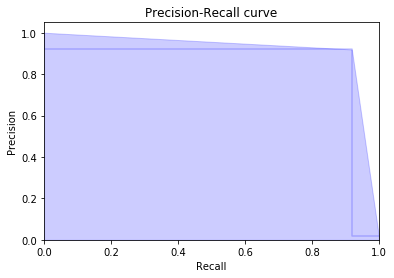

In [16]:
# Plot precision recall curve

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')